In [70]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv('../../../Datasets/ML/Mall_Customers.csv')

In [72]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [73]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

[400.0, 273.6688866264201, 157.70400815035947, 109.22822707921344, 65.56840815571681, 60.13287487193422, 49.668244837367986, 37.319122878338824, 32.49508119910091, 30.05932269404221]


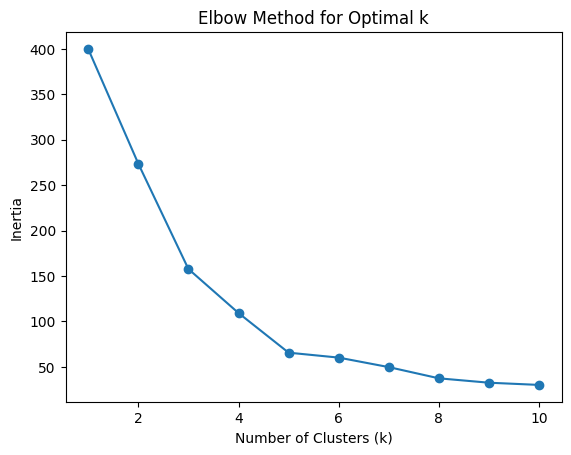

In [74]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
print(inertia)
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [75]:
kmeans = KMeans(n_clusters = 5, random_state = 42)
df['cluster'] = kmeans.fit_predict(X_scaled)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

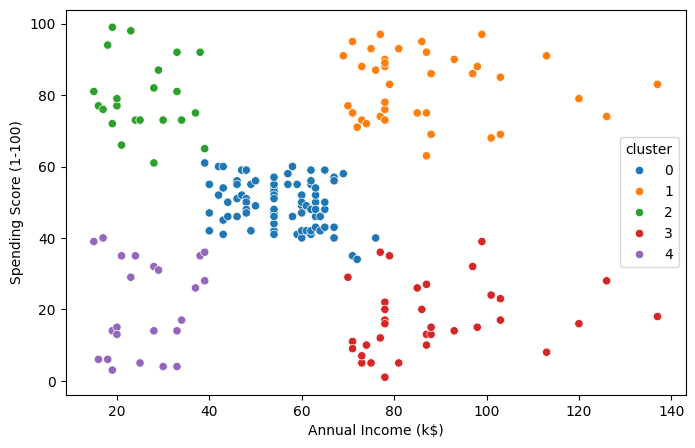

In [76]:
import seaborn as sns
plt.figure(figsize = (8, 5))
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'cluster', palette = 'tab10')